# pseudo_voigt_jl.ipynb

by Hezy Amiel

January 2023

Julia 1.8.5

https://en.m.wikipedia.org/wiki/Voigt_profile
http://journals.iucr.org/j/issues/1997/04/00/gl0484/gl0484.pdf
http://journals.iucr.org/j/issues/2000/06/00/nt0146/nt0146.pdf
https://www.onlinelibrary.wiley.com/doi/epdf/10.1002/sia.5521

In [103]:
using Plots, Distributions, SpecialFunctions

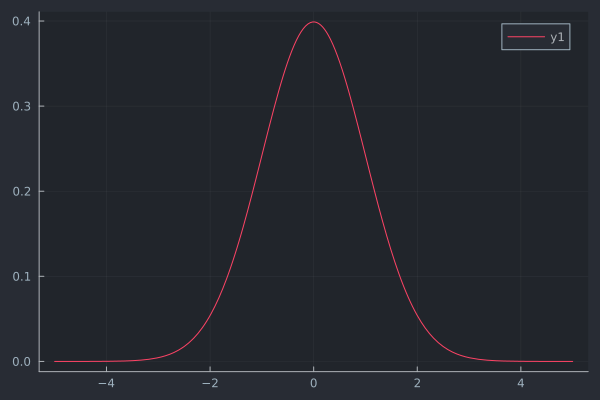

In [106]:
G = Normal(0,1)

plot(x->pdf(G, x))

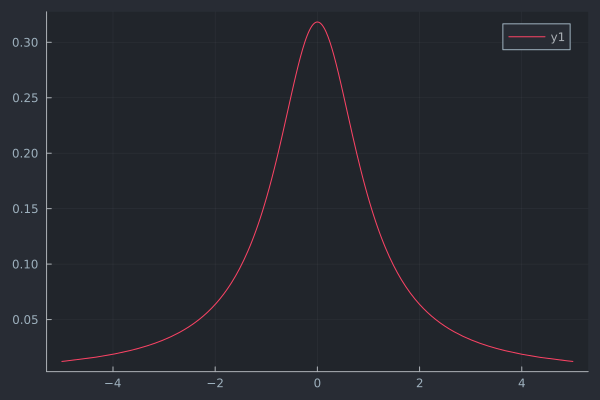

In [107]:
C = Cauchy(0,1)

plot(x->pdf(C, x))

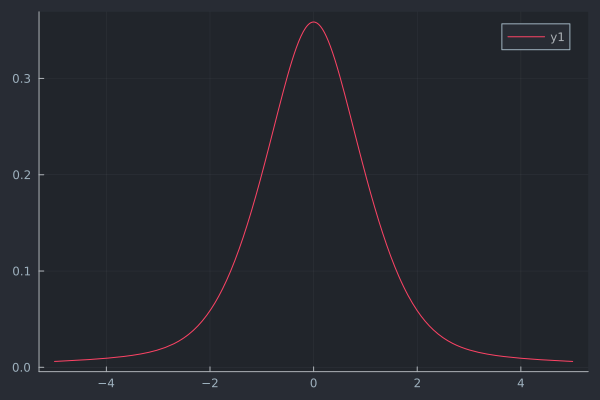

In [125]:
plot(x -> 1/2 * pdf(C, x) + 1/2 *pdf(G, x))

In [112]:
function Voigt(x, fwhm_L, fwhm_G)
    γ = fwhm_L / 2
    σ = fwhm_G / (2√(2log(2)))
    z = @. -im * (x + im * γ) / (√2 * σ)
    return @. real(erfcx(z)) / (√(2pi) * σ)
end

Voigt (generic function with 1 method)

In [122]:
#y1 = Lorentzian(x)
y2 = Gaussian(x, 1.0)
y3 = pseudo_Voigt(x, 1, 0.5)
y4 = Voigt(x, 0.45, 0.72)

MethodError: MethodError: no method matching Normal(::Float64, ::Float64, ::Float64)
Closest candidates are:
  Normal(::T, ::T; check_args) where T<:Real at ~/.julia/packages/Distributions/bQ6Gj/src/univariate/continuous/normal.jl:36
  Normal(::Real, ::Real; check_args) at ~/.julia/packages/Distributions/bQ6Gj/src/univariate/continuous/normal.jl:42
  Normal(::Real) at ~/.julia/packages/Distributions/bQ6Gj/src/univariate/continuous/normal.jl:44

In [114]:
p = plot(x, [y1 y2 y3 y4], label = ["Lorentzian" "Gaussian" "Pseudo Voigt" "Voigt"])
title!("peak functions")
xlabel!(raw"x")
ylabel!(raw"y")


UndefVarError: UndefVarError: y1 not defined